<a href="https://www.kaggle.com/code/paragghatage/model-training?scriptVersionId=258047214" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## testing Linear Regression Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.rand(100,1)

# np.random.rand(100,3) creates an array of size(100 by 3) and popultes it with random values from 0 to 1.

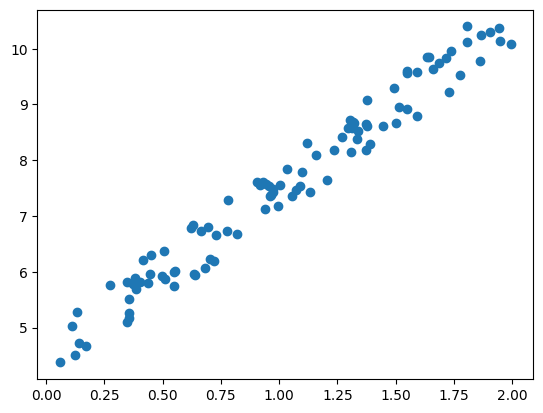

In [3]:
plt.scatter(X,y)

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

# .c_ concatinates 2 given vectors, .ones() function create a vector of given size containing all 1s

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.47150701],
       [3.0347627 ]])

## so, This method will find optimal solution in 1 shot calculation,
## but, it will be computationally expensive ,more memory requirement

# Gradient Descent- 
## iteratively finds optimal solution (minimizing cost function)

In [6]:
eta = 0.1 # learning raten_iterations = 1000
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initializationfor iteration in range(n_iterations):
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.47150701],
       [3.0347627 ]])

## Stocastic gradient descent:
choose 1 instance of training set randomly and calculate gradient.
Decrease learning rate gradually.
This will instead of calculating gradient for an entire batch at a time, it will calculate and update it for each instance till entire data is parsed.

In [7]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparametersdef learning_schedule(t):return t0 / (t + t1)
theta = np.random.randn(2,1) # random initializationfor epoch in range(n_epochs):for i in range(m):

def learning_schedule(t):
    return t0 / (t + t1)

m = 100

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.47229894],
       [3.04381363]])

The following code runs for maximum 1,000 epochs or until the loss drops by less than 0.001 during one epoch (max_iter=1000, tol=1e-3). It starts with a learning rate
of 0.1 (eta0=0.1), using the default learning schedule.

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter= 1000, tol = 1e-3,penalty= None, eta0 = 0.1)

sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.4371478]), array([3.0380323]))

## Mini-Batch Gradient Descent

at each step, instead of computing the gradients based on the full training set
(as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD
computes the gradients on small random sets of instances called mini-batches. The
main advantage of Mini-batch GD over Stochastic GD is that you can get a perfor‐
mance boost from hardware optimization of matrix operations, especially when using
GPUs.
(used in Deep Learning to achieve fast convergance and also levarage GPU boost)

## Polynomial Regression:
linear model to fit nonlinear data. A simple way to do this is to add powers of each
feature as new features, then train a linear model on this extended set of features. This
technique is called Polynomial Regression.

In [9]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-0.16990948,  0.02886923])

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.21496438]), array([[1.02905876, 0.45472309]]))

# Learning curve

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

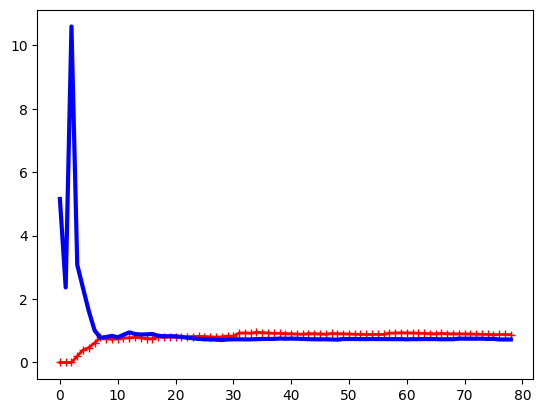

In [13]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)